# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [6]:
df_raw.describe() #function

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of GRE scores are much wider, between 200-800, rather than GPR range from 1.0-4.0. In addition the minimums and maximums are different, GRE from 220-800 and GPA 2.26-4.0.

#### Question 4. Drop data points with missing data


In [7]:
df = df_raw.dropna()

In [8]:
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Checked with the isnull and sum methods on my new dataframe.

In [23]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 6. Create box plots for GRE and GPA

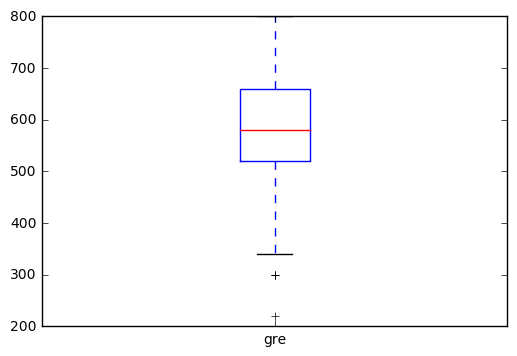

In [18]:
df['gre'].plot(kind='box') #boxplot 1


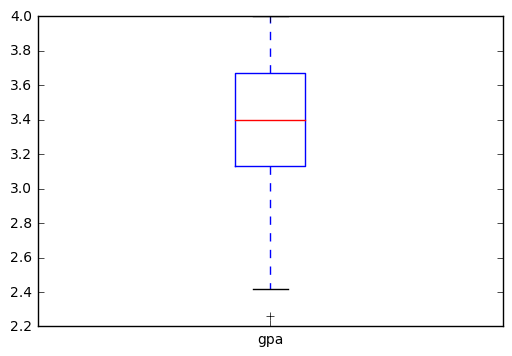

In [21]:
df['gpa'].plot(kind='box')   #boxplot 2 

#### Question 7. What do this plots show?

Answer: Each plot shows the quartiles for the different columns, GRE and GPA.

#### Question 8. Describe each distribution 

GRE: the median is 580 with a range from 330 - 660 from 25% to 75%

GPA: The median is 3.39 with a spread of 3.13 to 3.67 from 25% to 75%

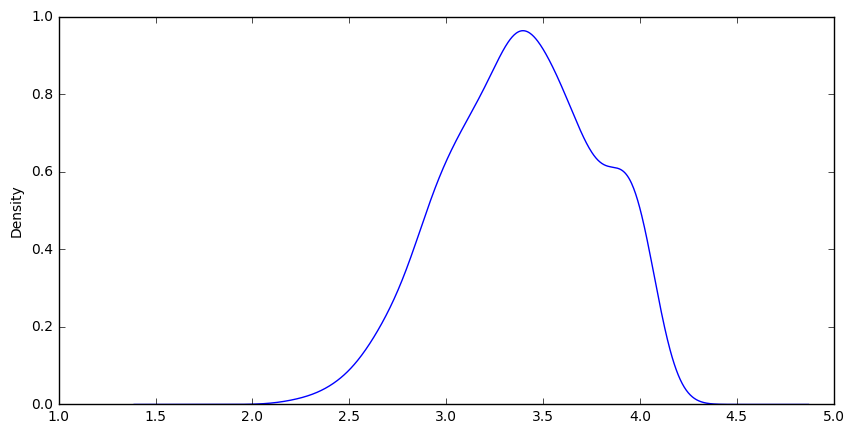

In [14]:
df['gpa'].plot(kind='density', figsize=(10,5))


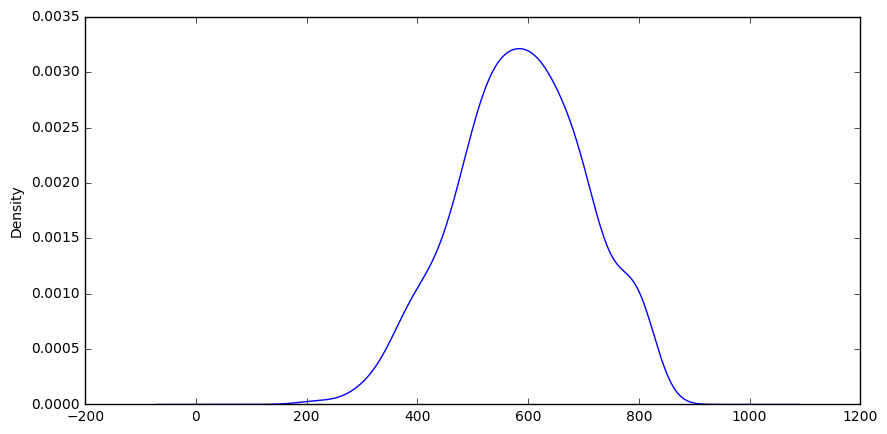

In [15]:
df['gre'].plot(kind='density', figsize=(10,5))

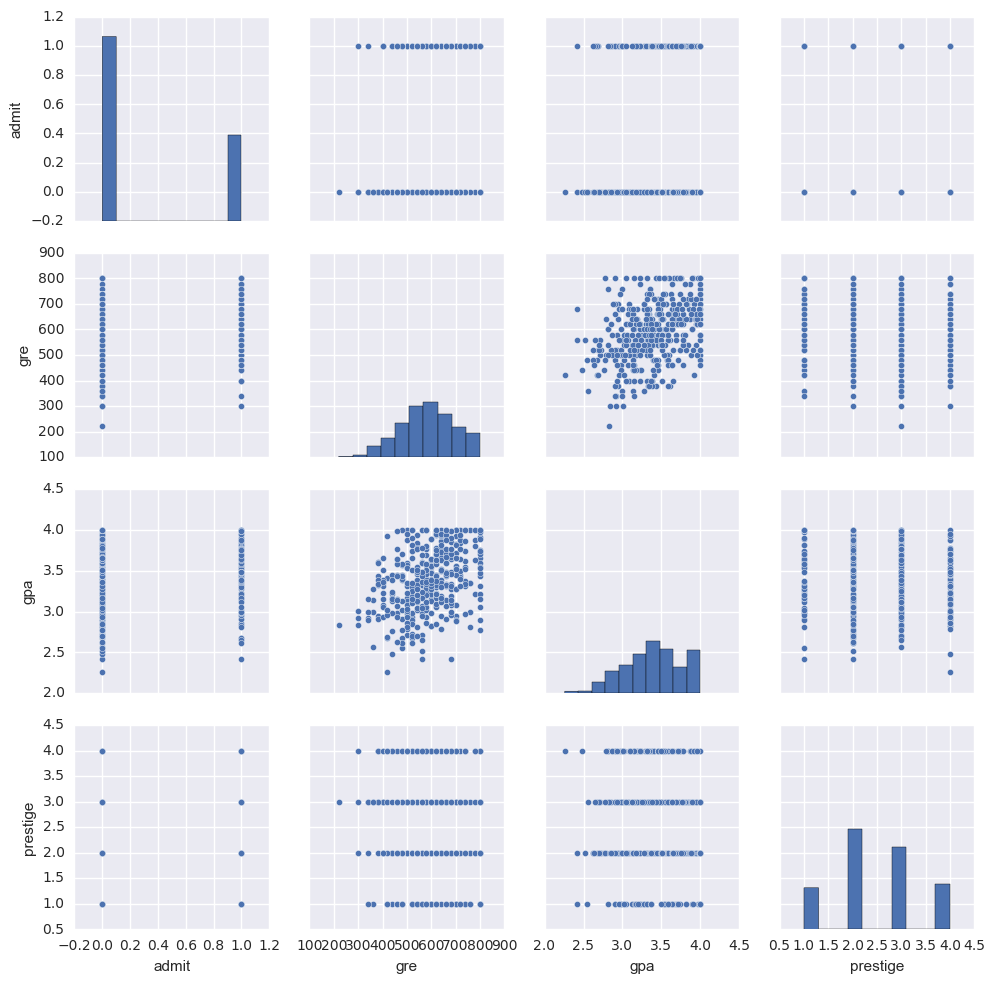

In [18]:
import seaborn as sns
sns.pairplot(df)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. Comparing the mean and median, they are very close to together, however, while they may be close to symetrical, they do not fall into the normal distribution. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: In order to achieve a normal distribution,  this data set should be transformed. One of the power transformations.

#### Question 11. Which of our variables are potentially colinear? 

In [24]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Neither GRE nor GPA are well correlated to Admit. GRE is only _slightly_ better correlated than GPA. Prestige has an negative correlation, meaning the better prestige (lower number), the better correlated to admission. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: This plan would seek to find a relationship between the independent variable of the prestige of the undergraduation institution and the dependent variable, graduate school admission as well as what form that relationship takes. Since Prestige is a category and not a continuous variable, the data will have to be grouped or segmented appropriately. 


#### Question 14. What is your hypothesis? 

Answer: The null hypothesis is there is no difference between a prestige rank of 1 and rank of 4 in admissions to UCLA. The alternative hypothesis is that prestige rank plays a large part in admissions and we will see a significant difference between the two groups. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

replacing the missing values with np.nan.

#### 2. Bonus: Log transform the skewed data

In [17]:
np.log(df.gre)

0      5.940171
1      6.492240
2      6.684612
3      6.461468
4      6.253829
5      6.633318
6      6.327937
7      5.991465
8      6.291569
9      6.551080
10     6.684612
11     6.086775
12     6.633318
13     6.551080
14     6.551080
15     6.173786
16     6.659294
17     5.886104
18     6.684612
19     6.291569
20     6.214608
21     6.492240
22     6.396930
23     6.522093
24     6.633318
25     6.684612
26     6.429719
27     6.253829
28     6.659294
29     6.253829
         ...   
370    6.291569
371    6.522093
372    6.522093
373    6.429719
374    6.327937
375    6.327937
376    6.429719
377    6.684612
378    6.461468
379    6.291569
380    6.551080
381    6.291569
382    6.291569
383    6.492240
384    6.173786
385    6.040255
386    6.606650
387    6.363028
388    6.461468
389    6.461468
390    6.684612
391    6.492240
392    6.396930
393    6.429719
394    6.131226
395    6.429719
396    6.327937
397    6.131226
398    6.551080
399    6.396930
Name: gre, dtype: float6

#### 3. Advanced: Impute missing data

In [34]:
df_fill = df_raw.fillna(0)

In [36]:
df_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         400 non-null float64
gpa         400 non-null float64
prestige    400 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB
